In [13]:
# Sydney Kao
# 017615869
# Assignment 12
# Professor Moon

# a) Load the Breast cancer data

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [14]:
# b) Print out the names of the features (X) and the name of the target (y)

print("FEATURES (X)")
features = data.feature_names
for i in range(len(features)):
    print(features[i])

print("\n")
print("TARGETS (y)")
targets = data.target_names
for i in range(len(targets)):
    print(targets[i])

FEATURES (X)
mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension


TARGETS (y)
malignant
benign


In [15]:
# c) Allocate half of the data to Train(X_train, y_train) and the remaining half to Test(X_text, y_text)

from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [16]:
# d) The common goal of the classifiers is predicting target features
# e) The classifiers should be trained using Train set and be tested using Test set
# f) Use the "Gini" index as the criterion and fix the maximum depth of trees as 2

from sklearn import tree

decisionTree = tree.DecisionTreeClassifier(criterion='gini', max_depth = 2)

In [17]:
# g) Write a program that generates a decision tree from X_train, y_train
# and predict y_pred from X_test. You can compute accuracy of the classifier by
# comparing y_pred and y_test. Please print out the accuracy.

decisionTree = decisionTree.fit(X_train, y_train)
y_pred = decisionTree.predict(X_test)

count = 0
for i in range(len(y_pred)):
    if (y_test[i] == y_pred[i]):
        count += 1
accuracy = count / len(y_pred)

print("ACCURACY:", accuracy)

ACCURACY: 0.9122807017543859


[Text(0.5, 0.8333333333333334, 'worst perimeter <= 105.95\ngini = 0.458\nsamples = 284\nvalue = [101, 183]'),
 Text(0.25, 0.5, 'worst concave points <= 0.161\ngini = 0.076\nsamples = 178\nvalue = [7, 171]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.034\nsamples = 174\nvalue = [3, 171]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.5, 'mean concave points <= 0.05\ngini = 0.201\nsamples = 106\nvalue = [94, 12]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 18\nvalue = [9, 9]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.066\nsamples = 88\nvalue = [85, 3]')]

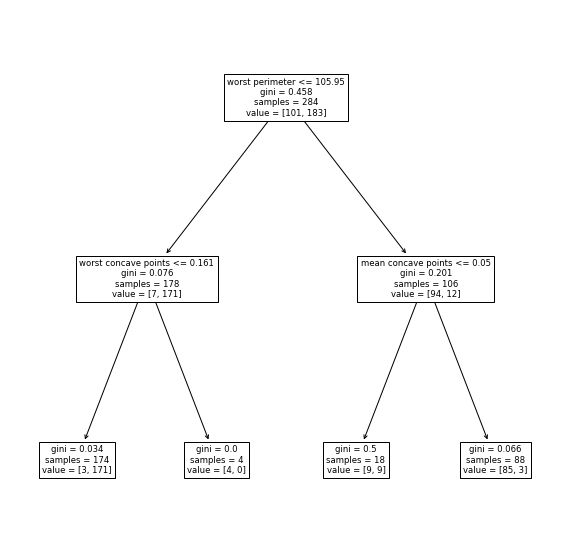

In [18]:
# h) Visualize the tree using sklearn.tree.plot_tree. Each node of trees should include feature name

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
tree.plot_tree(decisionTree, feature_names=features)

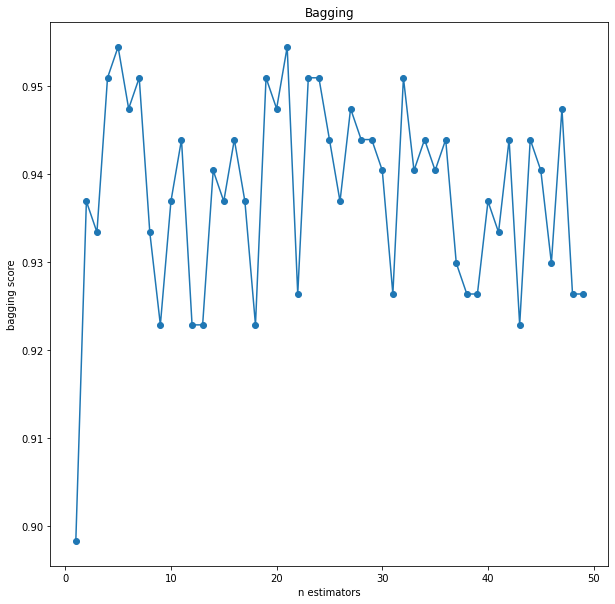

In [19]:
# i) Similarly, write a program that generates multiple decision trees using
# the bagging. This method should record its prediction accuracy at bagging score
# by varying the parameter n estimators. Draw a 2D line plot whose X-axis is
# n estimators and Y-axis bagging score, and the plot should have more than 20
# data points of different X-axis values.

from sklearn.ensemble import BaggingClassifier

# x-axis
n_estimator = []
# y-axis
bagging_score = []

for i in range(1, 50):
    # bagging score varies due to for loop
    bc = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='gini',max_depth=2),n_estimators=i).fit(X_train, y_train)
    bagging_score.append(bc.score(X_test, y_test))
    n_estimator.append(i)

plt.figure(figsize=(10,10))
plt.plot(n_estimator, bagging_score, marker='o')
plt.title('Bagging')
plt.xlabel("n estimators")
plt.ylabel("bagging score")
plt.show()


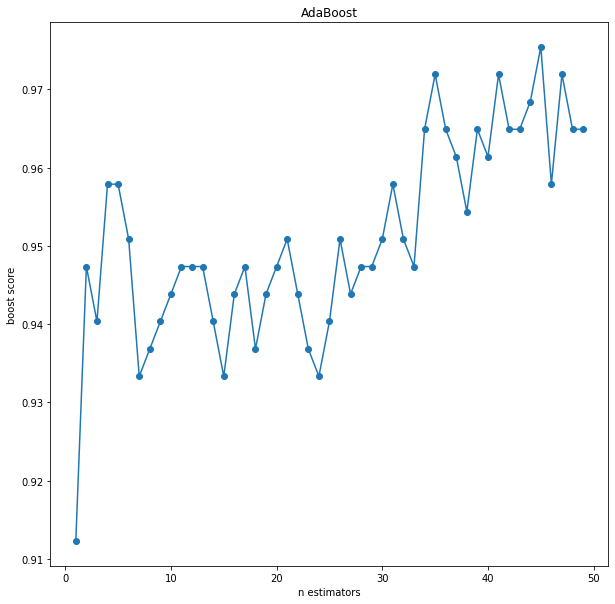

In [20]:
# j) Similarly, write a program that generates multiple decision trees using
# the AdaBoost. Draw a 2D line plot whose X-axis is n estimators and Y-axis
# boost score, and the plot should have more than 20 data points of different X-axis
# values.

from sklearn.ensemble import AdaBoostClassifier

# x-axis
n_estimator = []
# y-axis
boost_score = []

for i in range(1, 50):
    ada = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='gini',max_depth=2),n_estimators=i).fit(X_train,y_train)
    boost_score.append(ada.score(X_test, y_test))
    n_estimator.append(i)

plt.figure(figsize=(10,10))
plt.plot(n_estimator, boost_score, marker='o')
plt.title("AdaBoost")
plt.xlabel("n estimators")
plt.ylabel("boost score")
plt.show()

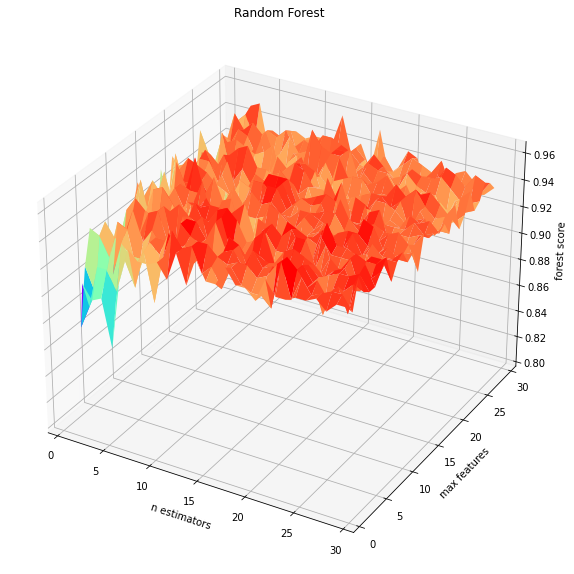

In [23]:
# k) Similarly, write a program that generates multiple decision trees using
# the random forest. Draw a 3D surface plot whose X-axis is n estimators, Y-axis
# max features, and Z-axis forest score. The plot should have more than 100 data
# points of different pair of X-axis and Y-axis values.

from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import numpy as np

# x-axis
n_estimator = []
# y-axis
max_features = []
# z-axis
forest_score = []

# for loop set to number of max features
for i in range(1, len(features)):
    for j in range(1, len(features)):
        random_forest = RandomForestClassifier(criterion='gini',max_depth=2,n_estimators=i,max_features=j).fit(X_train, y_train)
        n_estimator.append(i)
        max_features.append(j)
        forest_score.append(random_forest.score(X_test, y_test))

# resource for 3d surface plotting used: 
# https://stackoverflow.com/questions/51152043/creating-a-3d-surface-plot-from-three-1d-arrays
# array sizes are 841, 29*29 = 841
X = np.reshape(n_estimator,(29,29))
Y = np.reshape(max_features,(29,29))
Z = np.reshape(forest_score,(29,29))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Random Forest")
ax.set_xlabel('n estimators')
ax.set_ylabel('max features')
ax.set_zlabel('forest score')

ax.plot_surface(X, Y, Z, cmap=cm.rainbow)
plt.show()